# Fortuneo Alternante Data Scientist Test Technique
Une compagnie d’assurance santé va lancer un nouveau produit d’assurance automobile. Ils
ont besoin de votre aide pour créer un modèle permettant de prédire si les clients seront
intéressés par l'assurance automobile fournie par l’entreprise.
La construction du modèle de prédiction d’appétence d’assurance auto a un enjeu important
pour l'entreprise car elle permet de planifier en conséquence sa stratégie de communication
pour les clients et d’optimiser son modèle commercial.


## IMPORT

In [4]:
import numpy as np
import pandas as pd
import sys
import joblib
from joblib import dump
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import streamlit as st
import subprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importation des données

In [5]:
# Chemins vers les fichiers CSV
chemin_data_train = 'data_train.csv'
chemin_data_test = 'data_test.csv'

# Importation des données d'entraînement
data_train = pd.read_csv(chemin_data_train)

# Importation des données de test
data_test = pd.read_csv(chemin_data_test)

# Affichage des premières lignes des données d'entraînement pour vérification
print("Premières lignes des données d'entraînement:")
print(data_train.head())

# Affichage des premières lignes des données de test pour vérification
print("\nPremières lignes des données de test:")
print(data_test.head())

Premières lignes des données d'entraînement:
       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  148827  Female   45                1         46.0                   0   
1  336454    Male   25                1          8.0                   1   
2  367514  Female   57                1         28.0                   1   
3  355747    Male   50                1         33.0                   0   
4  238473  Female   21                1         28.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         21406.0                 124.0       22   
1    < 1 Year             No         58078.0                 152.0       86   
2    1-2 Year             No          2630.0                  26.0      214   
3    1-2 Year            Yes          2630.0                 163.0       61   
4    < 1 Year            Yes         44589.0                 152.0      131   

   Response  
0        

# EDA

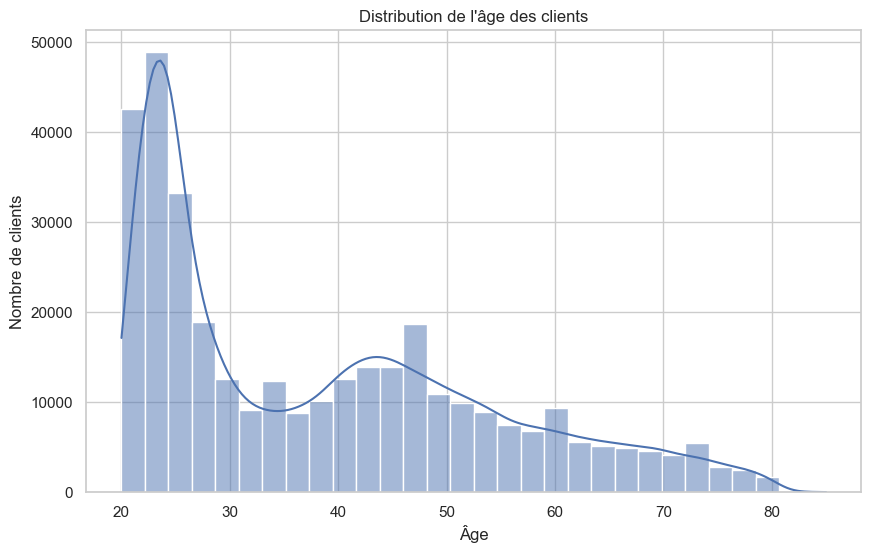

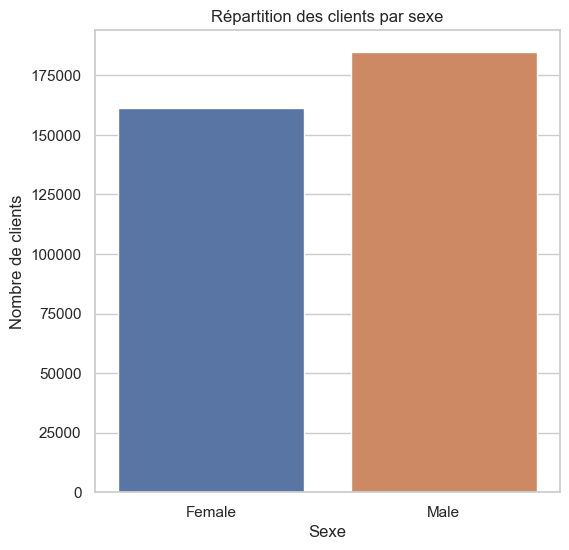

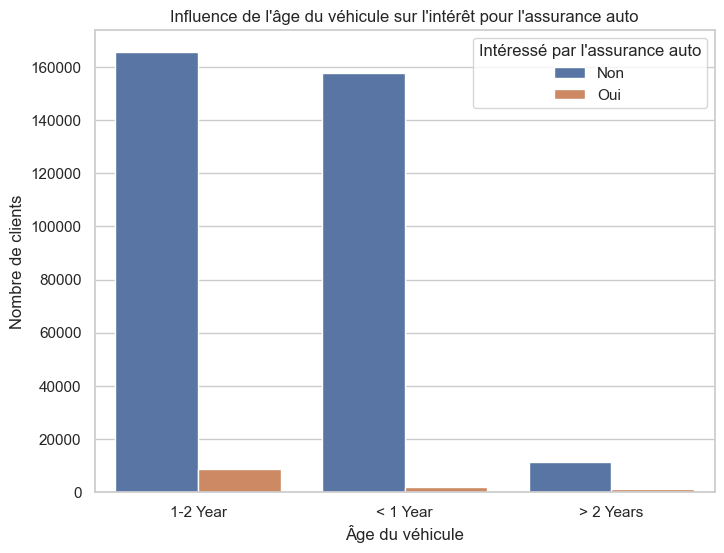

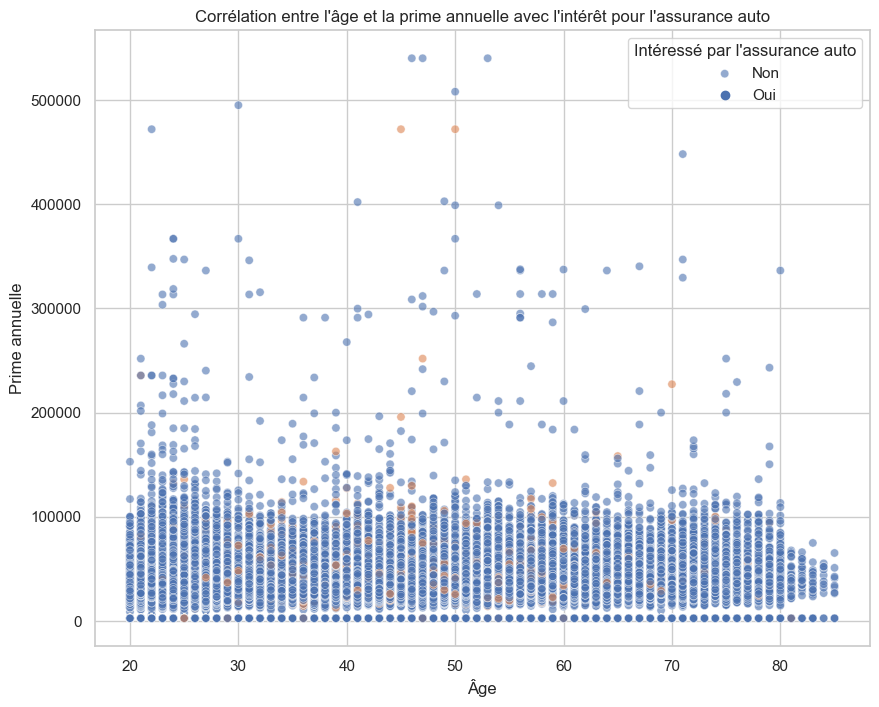

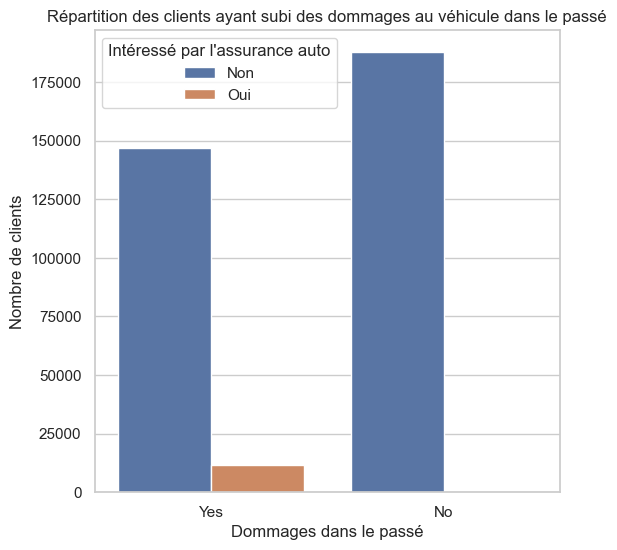

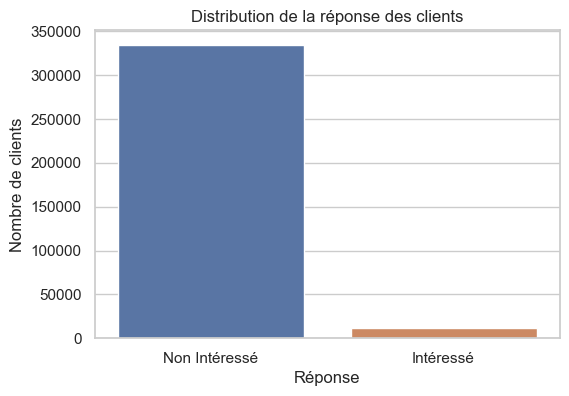

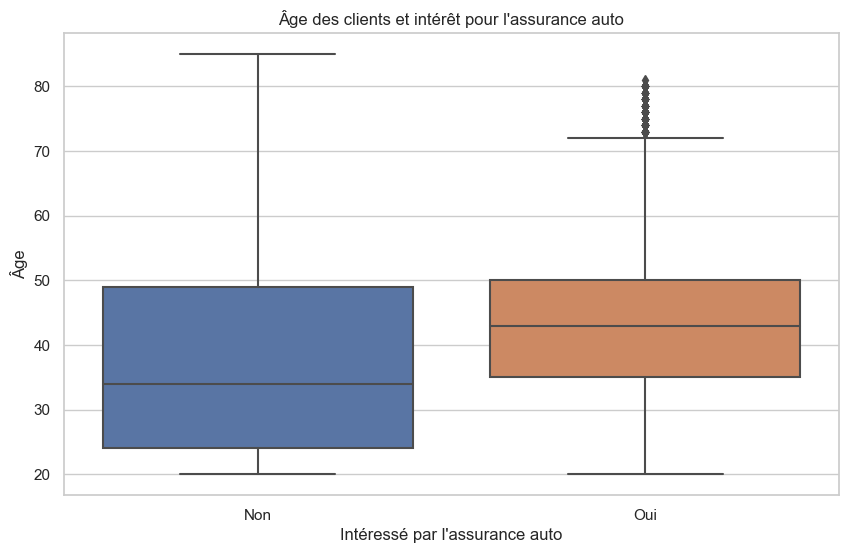

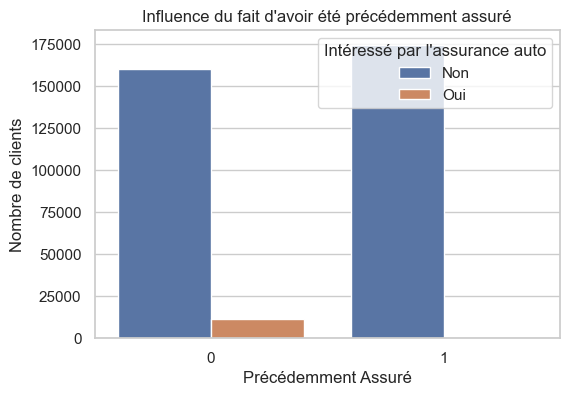

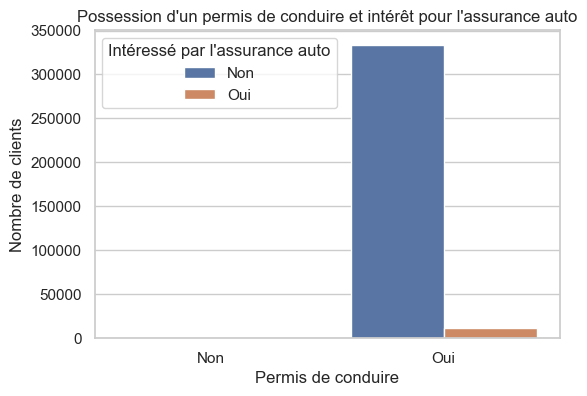

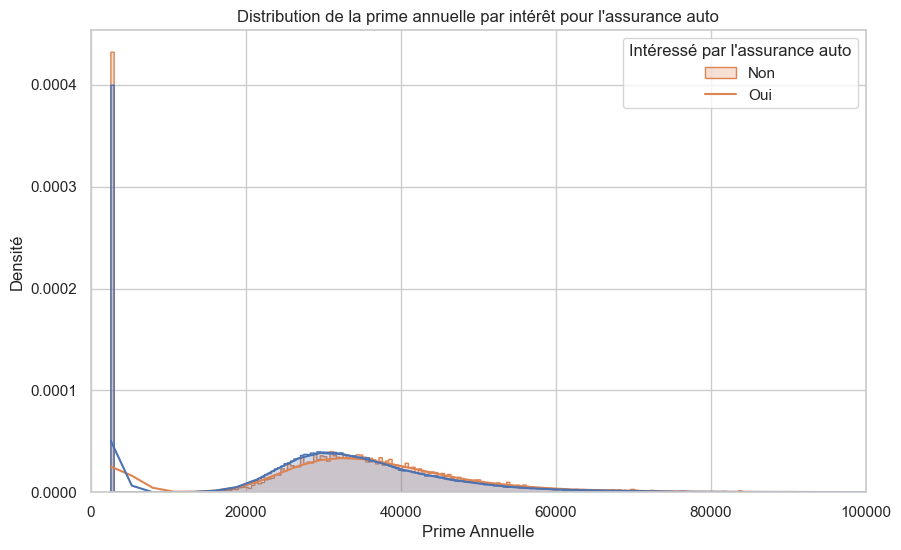

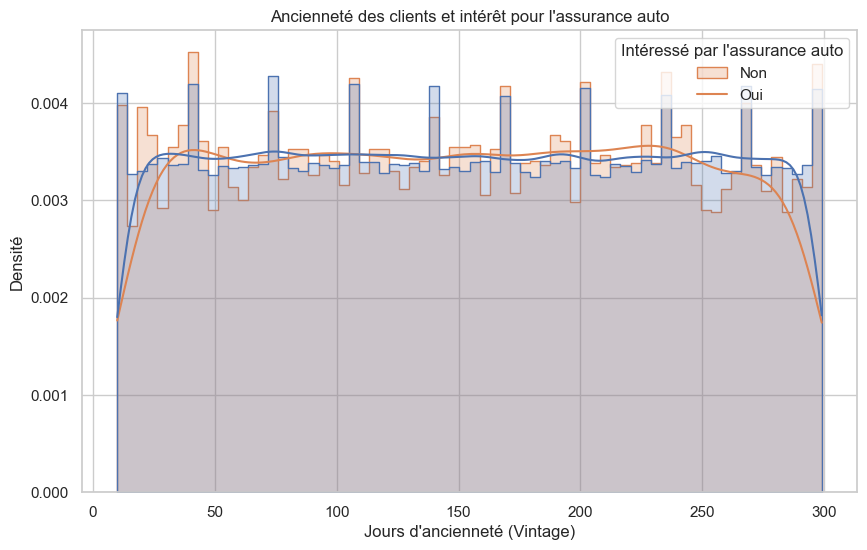

In [6]:
# Paramètres esthétiques de seaborn
sns.set(style="whitegrid")

# Chargement des données
data_train = pd.read_csv('data_train.csv')

# Distribution de l'âge des clients
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Age'], kde=True, bins=30)
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

# Répartition des clients par sexe
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=data_train)
plt.title('Répartition des clients par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de clients')
plt.show()

# Influence de l'âge du véhicule sur l'intérêt pour l'assurance auto
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Age', hue='Response', data=data_train)
plt.title('Influence de l\'âge du véhicule sur l\'intérêt pour l\'assurance auto')
plt.xlabel('Âge du véhicule')
plt.ylabel('Nombre de clients')
plt.legend(title='Intéressé par l\'assurance auto', labels=['Non', 'Oui'])
plt.show()

# Corrélation entre l'âge du client, la prime annuelle, et l'intérêt pour l'assurance auto
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Annual_Premium', hue='Response', data=data_train, alpha=0.6)
plt.title('Corrélation entre l\'âge et la prime annuelle avec l\'intérêt pour l\'assurance auto')
plt.xlabel('Âge')
plt.ylabel('Prime annuelle')
plt.legend(title='Intéressé par l\'assurance auto', labels=['Non', 'Oui'])
plt.show()

# Répartition des clients ayant subi des dommages au véhicule dans le passé
plt.figure(figsize=(6, 6))
sns.countplot(x='Vehicle_Damage', hue='Response', data=data_train)
plt.title('Répartition des clients ayant subi des dommages au véhicule dans le passé')
plt.xlabel('Dommages dans le passé')
plt.ylabel('Nombre de clients')
plt.legend(title='Intéressé par l\'assurance auto', labels=['Non', 'Oui'])
plt.show()

# Configuration des styles de seaborn pour les graphiques
sns.set(style="whitegrid")

# Distribution de la variable cible 'Response'
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=data_train)
plt.title('Distribution de la réponse des clients')
plt.xlabel('Réponse')
plt.ylabel('Nombre de clients')
plt.xticks([0, 1], ['Non Intéressé', 'Intéressé'])
plt.show()

# Corrélation entre l'âge du client et l'intérêt pour l'assurance auto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=data_train)
plt.title('Âge des clients et intérêt pour l\'assurance auto')
plt.xlabel('Intéressé par l\'assurance auto')
plt.ylabel('Âge')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()

# Influence du fait d'avoir été précédemment assuré sur l'intérêt pour l'assurance auto
plt.figure(figsize=(6, 4))
sns.countplot(x='Previously_Insured', hue='Response', data=data_train)
plt.title('Influence du fait d\'avoir été précédemment assuré')
plt.xlabel('Précédemment Assuré')
plt.ylabel('Nombre de clients')
plt.legend(title='Intéressé par l\'assurance auto', labels=['Non', 'Oui'])
plt.show()

# Corrélation entre la possession d'un permis de conduire et l'intérêt pour l'assurance auto
plt.figure(figsize=(6, 4))
sns.countplot(x='Driving_License', hue='Response', data=data_train)
plt.title('Possession d\'un permis de conduire et intérêt pour l\'assurance auto')
plt.xlabel('Permis de conduire')
plt.ylabel('Nombre de clients')
plt.legend(title='Intéressé par l\'assurance auto', labels=['Non', 'Oui'])
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()

# Corrélation entre la prime annuelle et l'intérêt pour l'assurance auto
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x="Annual_Premium", hue="Response", kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution de la prime annuelle par intérêt pour l\'assurance auto')
plt.xlabel('Prime Annuelle')
plt.ylabel('Densité')
plt.legend(title='Intéressé par l\'assurance auto', labels=['Non', 'Oui'])
plt.xlim(0, 100000) # Limite pour une meilleure visualisation
plt.show()

# Corrélation entre le nombre de jours d'ancienneté (Vintage) et l'intérêt pour l'assurance auto
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x="Vintage", hue="Response", kde=True, element="step", stat="density", common_norm=False)
plt.title('Ancienneté des clients et intérêt pour l\'assurance auto')
plt.xlabel('Jours d\'ancienneté (Vintage)')
plt.ylabel('Densité')
plt.legend(title='Intéressé par l\'assurance auto', labels=['Non', 'Oui'])
plt.show()


# Prétraitement des données

In [7]:
# Chargement des données
data_train = pd.read_csv('data_train.csv')

# Encodage des variables catégorielles
encoder = OneHotEncoder(sparse=False)
cat_variables = data_train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']]
cat_variables_encoded = encoder.fit_transform(cat_variables)

# Conversion en DataFrame pour faciliter la concaténation
# Utilisation de get_feature_names_out pour la compatibilité avec les versions récentes de sklearn
cat_variables_encoded_df = pd.DataFrame(cat_variables_encoded, columns=encoder.get_feature_names_out(cat_variables.columns))

# Préparation des données numériques
num_variables = data_train[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

# Normalisation des variables numériques
scaler = StandardScaler()
num_variables_scaled = scaler.fit_transform(num_variables)
num_variables_scaled_df = pd.DataFrame(num_variables_scaled, columns=num_variables.columns)

# Concaténation des variables catégorielles encodées et numériques normalisées
processed_data = pd.concat([cat_variables_encoded_df, num_variables_scaled_df, data_train['Response']], axis=1)

# Séparation des ensembles de données
X = processed_data.drop('Response', axis=1)
y = processed_data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Prétraitement terminé. Les données sont prêtes pour la modélisation.")


c:\Users\33660\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Prétraitement terminé. Les données sont prêtes pour la modélisation.


## La division des données en ensembles
La division des données en ensembles d'entraînement et de test est une étape cruciale pour évaluer la performance d'un modèle de machine learning de manière équitable. Vous utilisez l'ensemble d'entraînement pour entraîner le modèle et l'ensemble de test pour évaluer sa capacité à généraliser à de nouvelles données.

In [8]:
# Chargement des données d'entraînement
data_train = pd.read_csv('data_train.csv')

# Supposons que 'X' sont les caractéristiques et 'y' est la variable cible
X = data_train.drop('Response', axis=1)  # 'Response' est la colonne cible dans votre dataset
y = data_train['Response']

# Division des données d'entraînement en sous-ensembles d'entraînement et de validation
# Le paramètre 'test_size' définit la proportion de l'ensemble de données à inclure dans l'ensemble de test
# Le paramètre 'random_state' assure que la division est reproductible
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Division terminée. Tailles :")
print("Ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Ensemble de validation :", X_val.shape, y_val.shape)


Division terminée. Tailles :
Ensemble d'entraînement : (276860, 11) (276860,)
Ensemble de validation : (69216, 11) (69216,)


## Entraînement de différents modèles

In [9]:
# Chargement des données
data_train = pd.read_csv('data_train.csv')
X = data_train.drop('Response', axis=1)
y = data_train['Response']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement pour les variables numériques et catégorielles
numeric_features = ['Age', 'Annual_Premium', 'Vintage']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                        'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine les transformations numériques et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Définition des modèles à entraîner
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

# Entraînement et évaluation des modèles
for name, model in models.items():
    # Création du pipeline avec le prétraitement et le modèle
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    # Entraînement du modèle
    clf.fit(X_train, y_train)
    
    # Prédiction sur l'ensemble de test
    y_pred = clf.predict(X_test)
    
    # Évaluation du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy:.4f}')

Logistic Regression accuracy: 0.9658


## Évaluation des performances des modèles

In [ ]:
# Fonction pour évaluer un modèle
def evaluer_modele(y_test, y_pred, y_proba=None):
    """
    Évalue les performances d'un modèle en utilisant différentes métriques.

    :param y_test: Les vraies étiquettes.
    :param y_pred: Les étiquettes prédites par le modèle.
    :param y_proba: Les probabilités des prédictions, utilisées pour calculer l'AUC ROC.
    """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'Précision: {precision:.4f}')
    print(f'Rappel: {recall:.4f}')
    print(f'Score F1: {f1:.4f}')
    print(f'Exactitude (Accuracy): {accuracy:.4f}')
    
    if y_proba is not None:
        auc_roc = roc_auc_score(y_test, y_proba)
        print(f'AUC ROC: {auc_roc:.4f}')

# Supposons que vous avez entraîné vos modèles et faites des prédictions ainsi que calculé les probabilités
# Exemple d'évaluation pour un modèle hypothétique
# y_test : les vraies valeurs de la variable cible de l'ensemble de test
# y_pred : les prédictions du modèle pour l'ensemble de test
# y_proba : les probabilités de la classe positive prédites par le modèle pour l'ensemble de test

# Par exemple pour le modèle de régression logistique
# evaluer_modele(y_test, y_pred_logistique, y_proba_logistique)

# Vous devriez répéter l'appel à `evaluer_modele` pour chaque modèle que vous avez entraîné,
# en passant les valeurs appropriées pour `y_test`, `y_pred` et `y_proba` pour chaque modèle.


## Sélection du meilleur modèle

In [ ]:
# Chargement des données
data_train = pd.read_csv('data_train.csv')
X = data_train.drop('Response', axis=1)
y = data_train['Response']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Validation croisée et évaluation des performances
for name, model in models.items():
    # Validation croisée sur l'ensemble d'entraînement
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} CV AUC ROC: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")
    
    # Entraînement du modèle sur l'ensemble d'entraînement complet et évaluation sur l'ensemble de test
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probabilités pour la classe positive
    
    # Calcul de l'AUC ROC sur l'ensemble de test
    test_auc_roc = roc_auc_score(y_test, y_proba)
    print(f"{name} Test AUC ROC: {test_auc_roc:.4f}\n")
    
    # Affichage du rapport de classification
    print(f"Rapport de classification pour {name} :\n{classification_report(y_test, y_pred)}\n")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\33660\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\33660\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\33660\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\33660\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\33660\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\33660\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\33660\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\33660\anaconda3\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Male'
